# 0. Introduction

One of the most important skills to develop as a data scientist is the ability to communicate the results of your analysis to relevant stakeholders. In consulting, clients often do not have the time to read through your code line by line but instead are more interested in the key insights of a particular project, and how those insights can be used to make their business more efficient and profitable.

When done properly, data visualisation aims to summarise important trends and patterns in the dataset, therefore allowing the key points of an analysis to be communicated in a succint manner.

[Seaborn](https://seaborn.pydata.org/examples/index.html) is a library that is built specifically for the purpose of visualising data. In this notebook, I will demonstrate some of the most common visualisation techniques provided by the seaborn library with reference to the [Kaggle medical cost dataset](https://www.kaggle.com/mirichoi0218/insurance). This dataset contains information about 1,338 insurance beneficiaries living in the United States and the corresponding amount they pay for their health insurance premium.

I have chosen this dataset for the following reasons:
- Good mix of numerical and categorical variables
- Not too many features
- Intuitive and straightforward relationship between the predictor and target variables (charges)

I will demonstrate how seaborn can be used to visualise the distribution as well as the relationship between different variables in this dataset. Not included in this notebook is sns.lineplot, which is typically used to analyse time series.

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read data

In [2]:
data = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/medical-cost/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print("Shape of dataframe: ", data.shape)

Shape of dataframe:  (1338, 7)


# 3. Data description

Below are the description of the columns in the dataset:
- age: Age of primary beneficiary
- sex: Insurance contractor gender
- bmi: Body mass index
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: The beneficiary's residential area in the US
- charges: Individual medical costs billed by health insurance

# 4. Check missing values, data types and summary statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Missing data

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Hooray, no missing values!

In [6]:
# Data types

data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# Data type value counts

data.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

We have 3 categorical variables and 4 numerical variables.

In [8]:
# Summary statistics

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# 5. Feature engineering

Feature engineering is the process of creating new features using existing features in the dataset. In this section, I will create 3 new features:

- age_category
- weight_condition
- dependent

In [9]:
# Age category

data.loc[(data['age'] >= 18) & (data['age'] < 36), 'age_category'] = 'youth'
data.loc[(data['age'] >= 36) & (data['age'] <= 55), 'age_category'] = 'adults'
data.loc[data['age'] > 55, 'age_category'] = 'seniors'
data['age_category'].value_counts()

youth      574
adults     548
seniors    216
Name: age_category, dtype: int64

In [10]:
# Weight condition

data.loc[data['bmi'] < 18.5, 'weight_condition'] = 'underweight'
data.loc[(data['bmi'] >= 18.5) & (data['bmi'] < 25), 'weight_condition'] = 'normal weight'
data.loc[(data['bmi'] >= 25) & (data['bmi'] < 30), 'weight_condition'] = 'overweight'
data.loc[data['bmi'] >= 30, 'weight_condition'] = 'obese'
data['weight_condition'].value_counts()

obese            707
overweight       386
normal weight    225
underweight       20
Name: weight_condition, dtype: int64

In [11]:
# Dependent

data.loc[data['children'] > 0, 'dependent'] = 'yes'
data.loc[data['children'] == 0, 'dependent'] = 'no'
data['dependent'].value_counts()

yes    764
no     574
Name: dependent, dtype: int64

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_category,weight_condition,dependent
0,19,female,27.900,0,yes,southwest,16884.92400,youth,overweight,no
1,18,male,33.770,1,no,southeast,1725.55230,youth,obese,yes
2,28,male,33.000,3,no,southeast,4449.46200,youth,obese,yes
3,33,male,22.705,0,no,northwest,21984.47061,youth,normal weight,no
4,32,male,28.880,0,no,northwest,3866.85520,youth,overweight,no


In [13]:
# Missing data

data.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
region              0
charges             0
age_category        0
weight_condition    0
dependent           0
dtype: int64

In [14]:
# Data types 

data.dtypes

age                   int64
sex                  object
bmi                 float64
children              int64
smoker               object
region               object
charges             float64
age_category         object
weight_condition     object
dependent            object
dtype: object

In [15]:
# Data type value counts

data.dtypes.value_counts()

object     6
int64      2
float64    2
dtype: int64

After feature engineering, we now have 3 additional categorical variables, bringing the total to 6 categorical variables as well as 4 numerical variables.

# 6. Visualise distribution

Before we visualise the distribution of our data, it is always good practice that we first categorise the features in the dataset as either categorical or numerical variable. This is because they each have different distribution of values and hence require different plots to properly visualise them. Categorical variables have a discrete distribution whereas numerical variables have a continuous distribution.

Categorical variables:
- sns.countplot
- sns.catplot (formerly sns.factorplot)

Numerical variables:
- sns.boxplot
- sns.distplot
- sns.kdeplot
- sns.catplot

## 6.1 Categorical variables

Recall the categorical variables in our dataset include:
- sex
- smoker
- region
- age_category
- weight_condition
- dependent

## 6.1.1 sns.countplot

Countplot simply shows the count of each value in a column.

In [16]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'Sex Value Counts')

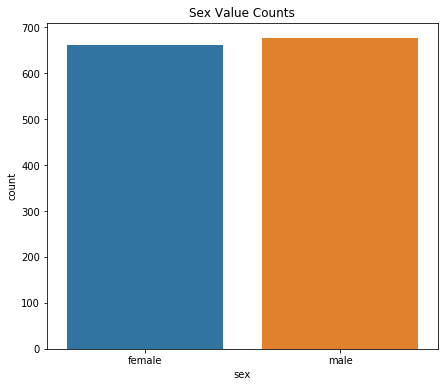

In [17]:
plt.figure(figsize = (7, 6))
sns.countplot(data['sex'])
plt.title('Sex Value Counts')

There is almost an equal distribution between male and female in the dataset.

In [18]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Smoker Value Counts')

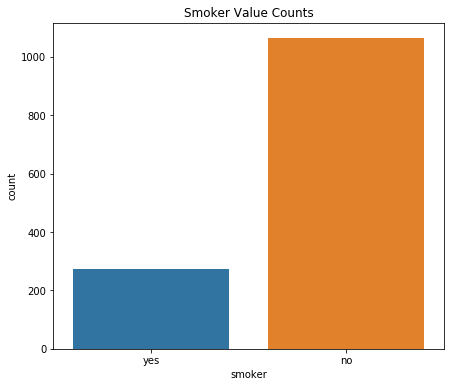

In [19]:
plt.figure(figsize = (7, 6))
sns.countplot(data['smoker'])
plt.title('Smoker Value Counts')

There are more non-smokers than there are smokers in the dataset.

In [20]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

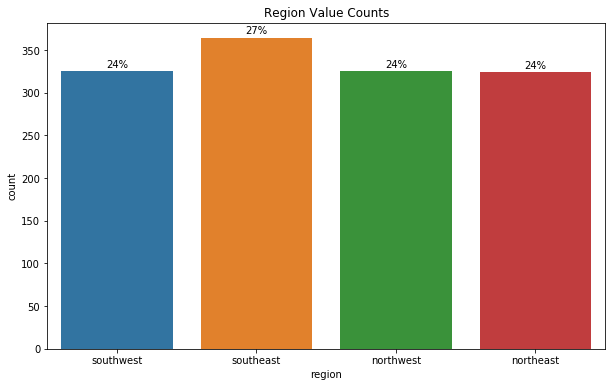

In [21]:
# Countplot with percentage

total = len(data)
plt.figure(figsize = (10, 6))
plt.title('Region Value Counts')
ax = sns.countplot(x = 'region', data = data)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

There is almost an equal distribution between the 4 regions with southeast having slightly more people.

In [22]:
data['age_category'].value_counts()

youth      574
adults     548
seniors    216
Name: age_category, dtype: int64

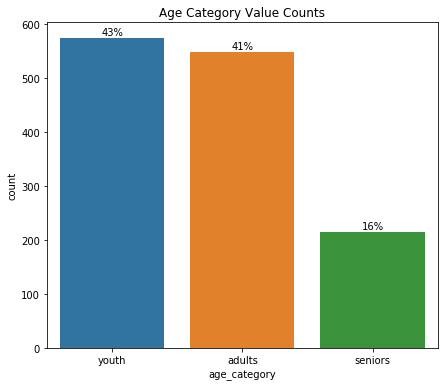

In [23]:
total = len(data)
plt.figure(figsize = (7, 6))
plt.title('Age Category Value Counts')
ax = sns.countplot(x = 'age_category', data = data)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

There is almost and equal distribution between youth and adults. Seniors have the least number of people.

In [24]:
data['weight_condition'].value_counts()

obese            707
overweight       386
normal weight    225
underweight       20
Name: weight_condition, dtype: int64

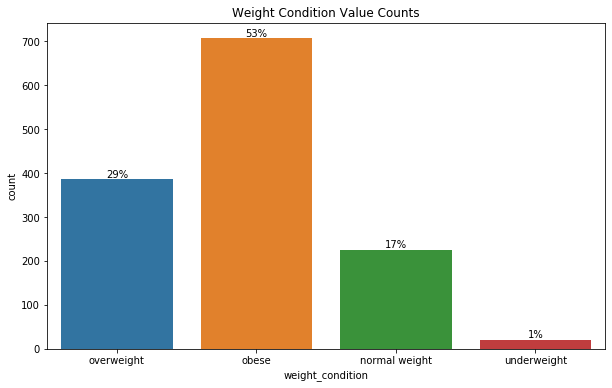

In [25]:
total = len(data)
plt.figure(figsize = (10, 6))
plt.title('Weight Condition Value Counts')
ax = sns.countplot(x = 'weight_condition', data = data)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

Oh no! More than half the beneficiaries are considered obese.

In [26]:
data['dependent'].value_counts()

yes    764
no     574
Name: dependent, dtype: int64

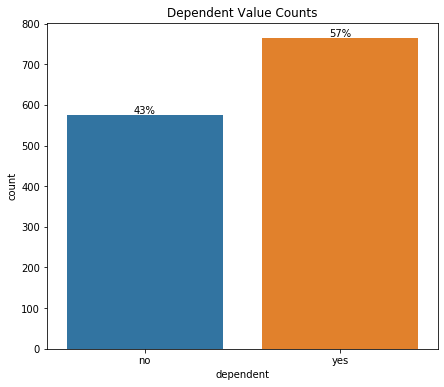

In [27]:
total = len(data)
plt.figure(figsize = (7, 6))
plt.title('Dependent Value Counts')
ax = sns.countplot(x = 'dependent', data = data)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

Majority of the  beneficiaries have children.

## 6.1.2 sns.catplot (formerly sns.factorplot)

Factorplot allows us to further break down a categorical variable using another categorical variable.

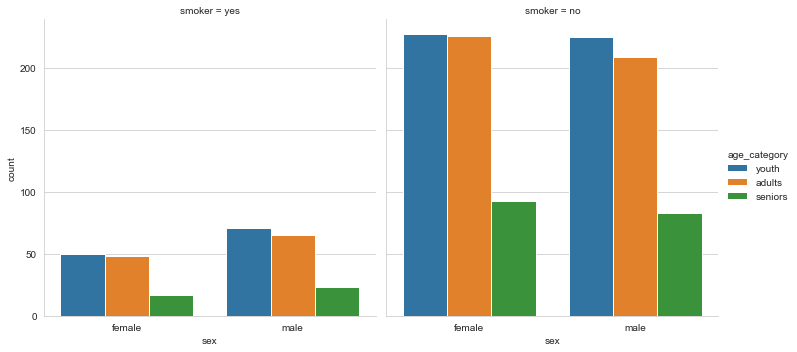

In [28]:
sns.set_style('whitegrid')
sns.catplot('sex', col = 'smoker', hue = 'age_category', data = data, kind = 'count')

Here, I have divided the population up by their gender, smoking habits and age category.

As we can observe from the plot, there are more male smokers than there are female smokers. Most smokers belong to the youth and adults age categories.

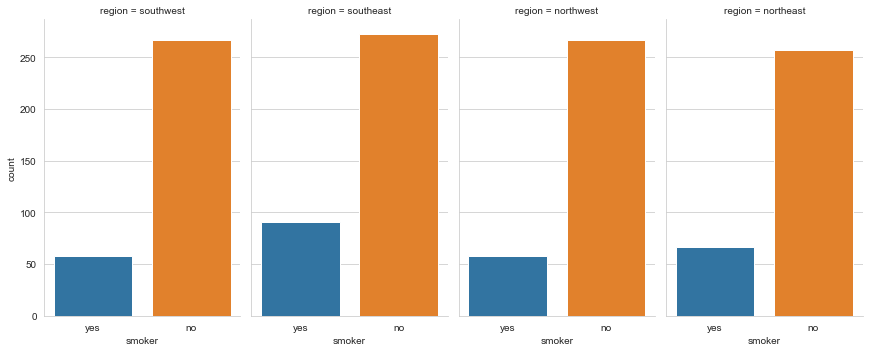

In [29]:
sns.set_style('whitegrid')
sns.catplot(x = 'smoker', col = 'region', data = data, kind = 'count', aspect = 0.6)

Southeast region has the highest number of smokers.

## 6.2 Numerical variable

Recall the numerical variables in our dataset include:
- age
- bmi
- children
- charges

## 6.2.1 sns.boxplot

Boxplot is one of the most popular plots in statistics. It gives an overview of the distribution of a continuous variable.

Text(0.5, 1.0, 'Charges by Smoking Habits')

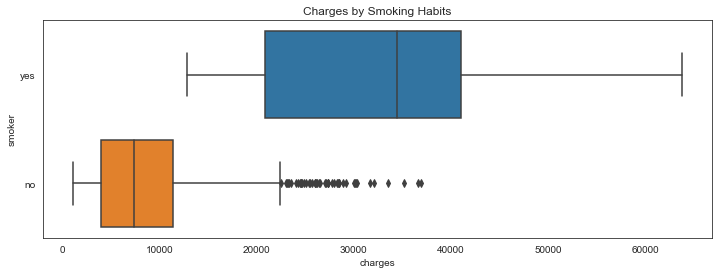

In [30]:
sns.set_style('white')
plt.figure(figsize = (12, 4))
sns.boxplot(y = data['smoker'], x = data['charges'])
plt.title('Charges by Smoking Habits')

As expected, smokers pay a higher premium than non-smokers.

Text(0.5, 1.0, 'Charges by Age Category')

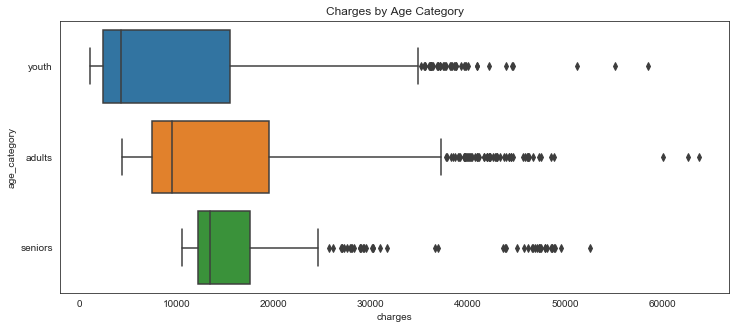

In [31]:
sns.set_style('white')
plt.figure(figsize = (12, 5))
sns.boxplot(y = data['age_category'], x = data['charges'])
plt.title('Charges by Age Category')

People pay more for health insurance as they get older.

## 6.2.2 sns.distplot

Text(0.5, 1.0, 'BMI Distribution')

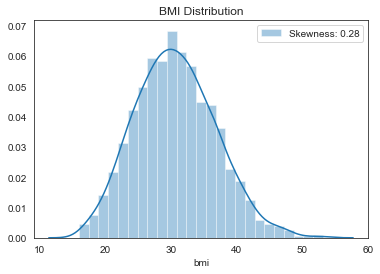

In [32]:
sns.set_style('white')
sns.distplot(data['bmi'], label = 'Skewness: %.2f'%(data['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('BMI Distribution')

BMI follows a normal distribution but the average BMI for this population is considered overweight or obese. This comes at no surprise as the United States has one of the highest levels of obesity in the world.

In [33]:
print("Average BMI: {:.2f}".format(data['bmi'].mean()))

Average BMI: 30.66


Text(0.5, 1.0, 'BMI Distribution')

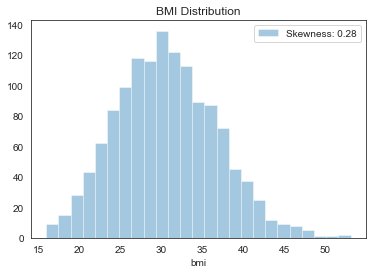

In [34]:
sns.set_style('white')
sns.distplot(data['bmi'], label = 'Skewness: %.2f'%(data['bmi'].skew()), kde = False)
plt.legend(loc = 'best')
plt.title('BMI Distribution')

We can remove kernel distribution estimation (kde) from distplot by simply setting the kde argument to False.

## 6.2.3 sns.kdeplot

In statistics, kernel distribution estimation is a non-parametric way to estimate the probability density function of a random variable. Essentially, it applies data smoothing to a normal histogram but still serves the same purpose of visualising a continuous variable.

Text(0.5, 1.0, 'Charges by Gender')

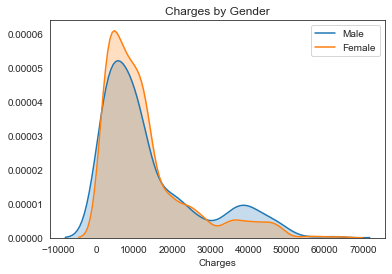

In [35]:
sns.set_style('white')
sns.kdeplot(data.loc[data['sex'] == 'male', 'charges'], label = 'Male', shade = True)
sns.kdeplot(data.loc[data['sex'] == 'female', 'charges'], label = 'Female', shade = True)
plt.xlabel('Charges')
plt.title('Charges by Gender')

Females pay higher premiums than male. This could be due to the fact that there are more male smokers than there are female smokers.

Text(0.5, 1.0, 'Charges by Age Category')

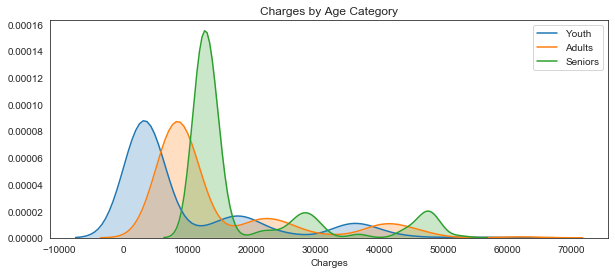

In [36]:
plt.figure(figsize = (10, 4))
sns.kdeplot(data.loc[data['age_category'] == 'youth', 'charges'], label = 'Youth', shade = True)
sns.kdeplot(data.loc[data['age_category'] == 'adults', 'charges'], label = 'Adults', shade = True)
sns.kdeplot(data.loc[data['age_category'] == 'seniors', 'charges'], label = 'Seniors', shade = True)
plt.xlabel('Charges')
plt.title('Charges by Age Category')

As we have seen earlier, premium level increases with age.

# 7. Visualise relationship

- sns.heatmap
- sns.barplot
- sns.jointplot
- sns.scatterplot
- sns.regplot
- sns.lmplot
- sns.swarmplot
- sns.violinplot
- sns.pairplot
- sns.pointplot

## 7.1 sns.heatmap

Heatmap is one of the easiest ways to analyse the correlation between numerical variables. A positive correlation implies that two variables move in the same direction. Conversely, a negative correlation implies that two variable move in the opposite direction.

Text(0.5, 1, 'Correlation Between Numerical Variables')

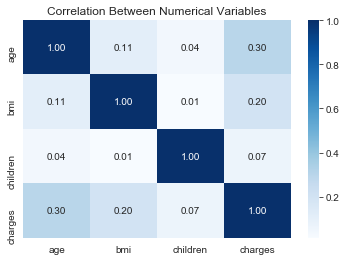

In [37]:
correlation = correlation = data[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation Between Numerical Variables')

The diagonal of a heatmap is always one because they represent the correlation between a variable and itself. The diagonal can also be seen as a mirror between the bottom triangle and the top triangle. If you look closely, the two triangles contain the same set of information.

There are two ways to interpret a heatmap: by reading across the columns or by reading down the rows.

As we can see from the charges column/row, age is the most correlated feature to charges, followed by bmi and finally children.

In [38]:
correlation['charges'].sort_values(ascending = False).drop('charges')

age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

## 7.2 sns.barplot

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. 

Text(0.5, 1.0, 'Charges by Region')

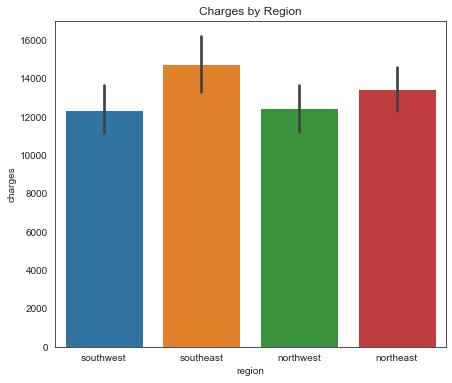

In [39]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.barplot(x = 'region', y = 'charges', data = data)
plt.title('Charges by Region')

Southeast region pays the highest premium. This could be due to the fact that the region has the highest number of smokers which in turn drove up the average premium levels.

Text(0.5, 1.0, 'Charges by Dependent')

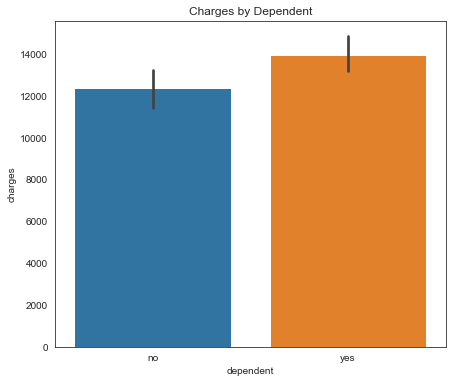

In [40]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.barplot(x = 'dependent', y = 'charges', data = data)
plt.title('Charges by Dependent')

Policyholders that have children pay a higher premium than those without children. Not exactly sure why.

## 7.3 sns.jointplot

Jointplot shows where data points lie between two separate numerical variables.

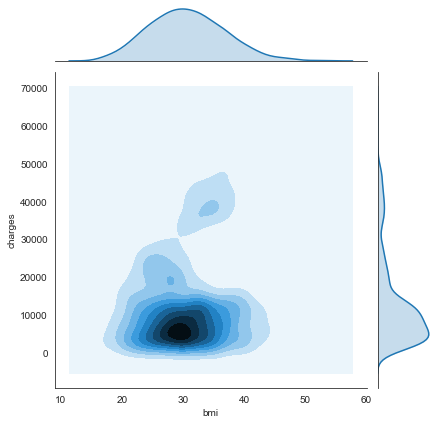

In [41]:
sns.jointplot(x = 'bmi', y = 'charges', data = data, kind = 'kde')

The darker region represents the majority of the population.

## 7.4 sns.scatterplot

Scatterplot is a good way to spot outliers in your data.

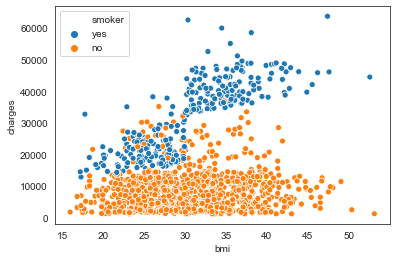

In [42]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data)

In [43]:
obese_smoker = data.loc[(data['weight_condition'] == 'obese') & (data['smoker'] == 'yes'), :]
obese_nonsmoker = data.loc[(data['weight_condition'] == 'obese') & (data['smoker'] == 'no'), :]

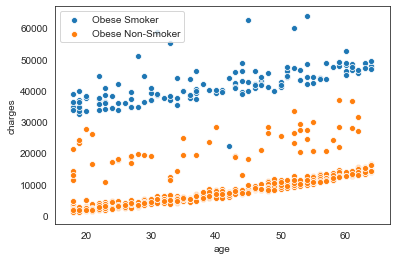

In [44]:
sns.set_style('white')
sns.scatterplot(x = 'age', y = 'charges', data = obese_smoker, label = 'Obese Smoker')
sns.scatterplot(x = 'age', y = 'charges', data = obese_nonsmoker, label = 'Obese Non-Smoker')

## 7.5 regplot

Regplot plots the data and adds a linear regression model fit.

Text(0.5, 1.0, 'Charges Against BMI')

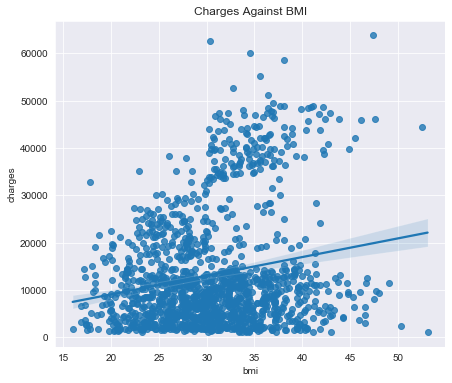

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize = (7, 6))
sns.regplot(x = 'bmi', y = 'charges', data = data)
plt.title('Charges Against BMI')

The linear line has a positive slope, suggesting a positive relationship between bmi and charges. The higher the BMI, the higher the premium for health insurance. 

## 7.6 lmplot

lmplot combines regplot and FacetGrid. The FacetGrid class helps in visualising the distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

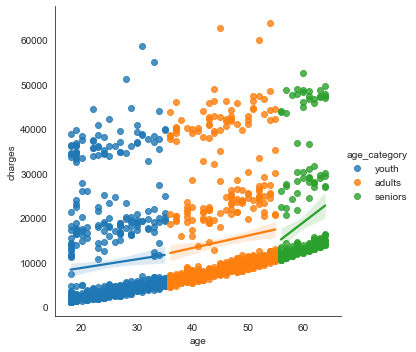

In [46]:
sns.set_style('white')
sns.lmplot(x = 'age', y = 'charges', hue = 'age_category', data = data)

Here, I have plotted a lmplot of charges against age but further categorised by age categories. 

There is a positive relationship between age and charges. Senior citizens have a much steeper increase due to the higher risks of health complications at older ages. 

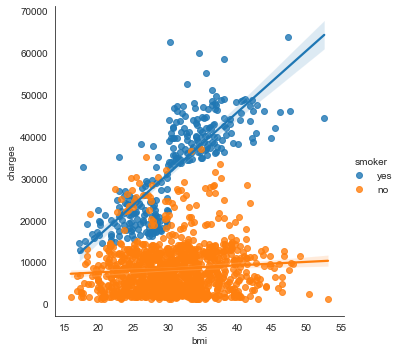

In [47]:
sns.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data)

Here, I have plotted a lmplot of charges against bmi but further categorised by smoking status.

Again, we see the positive relationship between bmi and charges but a dramatically steeper hike for smokers in comparison to non-smokers. We can conclude that smoking significantly raises the premium levels for health insurance. 

## 7.7 sns.swarmplot

Swarmplot draws a categorical scatterplot with non-overlapping points.

Text(0.5, 1.0, 'Charges by Smoking Habits')

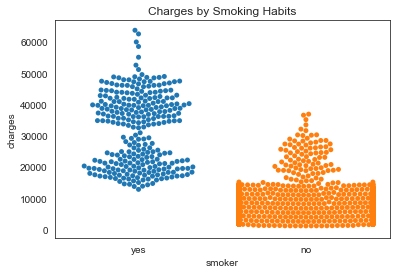

In [48]:
sns.set_style('white')
sns.swarmplot(x = data['smoker'], y = data['charges'])
plt.title('Charges by Smoking Habits')

## 7.8 sns.violinplot

Violinplot draws a combination of boxplot and kernel density estimate.

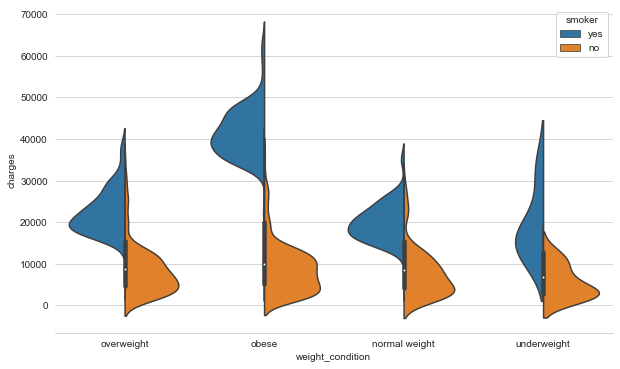

In [49]:
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')
sns.violinplot(x = 'weight_condition', y = 'charges', hue = 'smoker', data = data, split = True)
sns.despine(left = True)

## 7.9 sns.pointplot

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

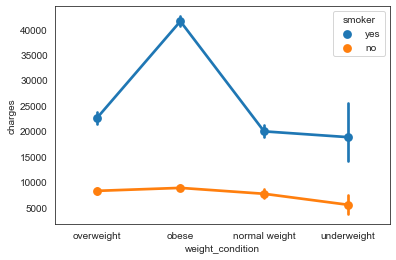

In [50]:
sns.set_style('white')
sns.pointplot(x = 'weight_condition', y = 'charges', hue = 'smoker', data = data)

Obese smokers pay a significantly higher premium.

## 7.10 sns.pairplot

Pairplot plots pairwise relationships in a dataset.

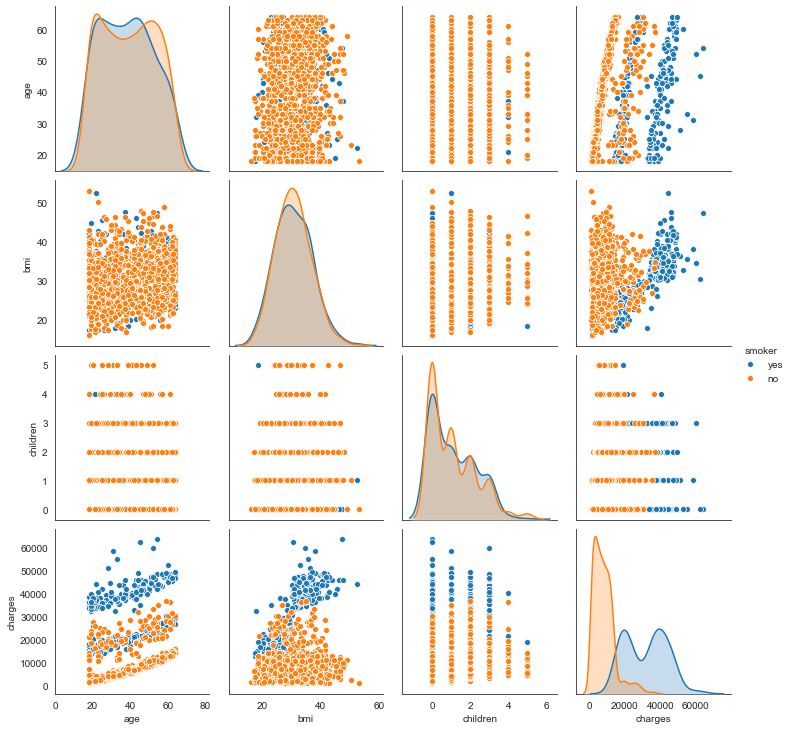

In [51]:
sns.pairplot(data, hue = 'smoker')

Here, we can examine how smoking correlates with the other numerical variables in our dataset. 

# 8. Conclusion

To summarise, seaborn is a data visualisation library that is built on top of the Python language. In this notebook, we have considered various plots that we can use to visualise distributions as well the relationship between different variables in our dataset. It is important to distinguish between categorical and numerical variables when visualing data as they each require different plots to properly visualise and interpret them.

I hope you have learned more about the seaborn library as well as how different features such as age, gender, smoking habits and weight condition correlate with premium levels for health insurance.

As usual, feel free to reach out to me if you have any questions or constructive feedback. Happy learning!

My platforms: 
- [Facebook](https://www.facebook.com/chongjason914)
- [Instagram](https://www.instagram.com/chongjason914)
- [Twitter](https://www.twitter.com/chongjason914)
- [LinkedIn](https://www.linkedin.com/in/chongjason914)
- [YouTube](https://www.youtube.com/channel/UCQXiCnjatxiAKgWjoUlM-Xg?view_as=subscriber)
- [Medium](https://www.medium.com/@chongjason)